In [39]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
from scipy import stats
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

In [11]:
reader = csv.reader(open('do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'), delimiter=',', quotechar='|')

ParamsDict = {}
for row in reader:
    #print(', '.join(row))
    print(row[0])

BINARY
BOLD
FCFC
G
MODEL
  P [min
  P dtype .................. float64
  P shape .................. (1
  Q [min
  Q dtype .................. float64
  Q shape .................. (1
  Type ..................... WilsonCowan
  a_e [min
  a_e dtype ................ float64
  a_e shape ................ (1
  a_i [min
  a_i dtype ................ float64
  a_i shape ................ (1
  alpha_e [min
  alpha_e dtype ............ float64
  alpha_e shape ............ (1
  alpha_i [min
  alpha_i dtype ............ float64
  alpha_i shape ............ (1
  b_e [min
  b_e dtype ................ float64
  b_e shape ................ (1
  b_i [min
  b_i dtype ................ float64
  b_i shape ................ (1
  c_e [min
  c_e dtype ................ float64
  c_e shape ................ (1
  c_ee [min
  c_ee dtype ............... float64
  c_ee shape ............... (1
  c_ei [min
  c_ei dtype ............... float64
  c_ei shape ............... (1
  c_i [min
  c_i dtype ................ float64


In [8]:
reader = csv.DictReader(open('do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'))

result = {}
for row in reader:
    print(', '.join(row))

BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True


In [5]:
dictobj

OrderedDict([('BINARY', 'BOLD'), ('True', 'False')])

In [20]:
# Empty dict
ParamsDict = { }
ParamsDict["name"] = "MouseCortex"
ParamsDict["G"] = np.array([1.9]) 
ParamsDict["REMOVE"] = [7]
ParamsDict["BINARY"]=True

# Ye dunno why having the closing square bracket messes up glob glob. 
Sim_run_files = glob.glob("do-not-track/LCycle_G[0.4*_.csv")
print(Sim_run_files)

# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(Sim_run_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0

SCM = con.weights

# current_calculator(bold_data,ParamsDict["G"],con.weights)

['do-not-track\\LCycle_G[0.45]_MouseCortex_FCM_20200802-201738_.csv', 'do-not-track\\LCycle_G[0.45]_MouseCortex_Params_20200802-201738_.csv', 'do-not-track\\LCycle_G[0.45]_MouseCortex_Scorr_20200802-201738_.csv', 'do-not-track\\LCycle_G[0.45]_MouseCortex_Tseries_20200802-201738_.csv', 'do-not-track\\LCycle_G[0.4]_MouseCortex_FCM_20200802-201729_.csv', 'do-not-track\\LCycle_G[0.4]_MouseCortex_Params_20200802-201729_.csv', 'do-not-track\\LCycle_G[0.4]_MouseCortex_Scorr_20200802-201729_.csv', 'do-not-track\\LCycle_G[0.4]_MouseCortex_Tseries_20200802-201729_.csv']
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


In [60]:
# External Current Calculator:
J_e = []
#len(bold_time)
for j in np.arange(1000):       
    t_0 = []
    # Specific column (or time point)
    for i in np.arange(SCM.shape[0]): 
        # Sum over all external currents (May need to do SCM[:,i] instead)  
        t  = sum(bold_data[:,j]*SCM[i])
        # To obtain currents to particular region
        t_0.append(t)
    J_e.append(t_0)

J_e = np.array(J_e)
print("Max",np.max(J_e))
print("Median",np.median(J_e))
print("Min",np.min(J_e))

Max 7.7264176130266256
Median 1.156397619036871
Min 0.002501683507954588


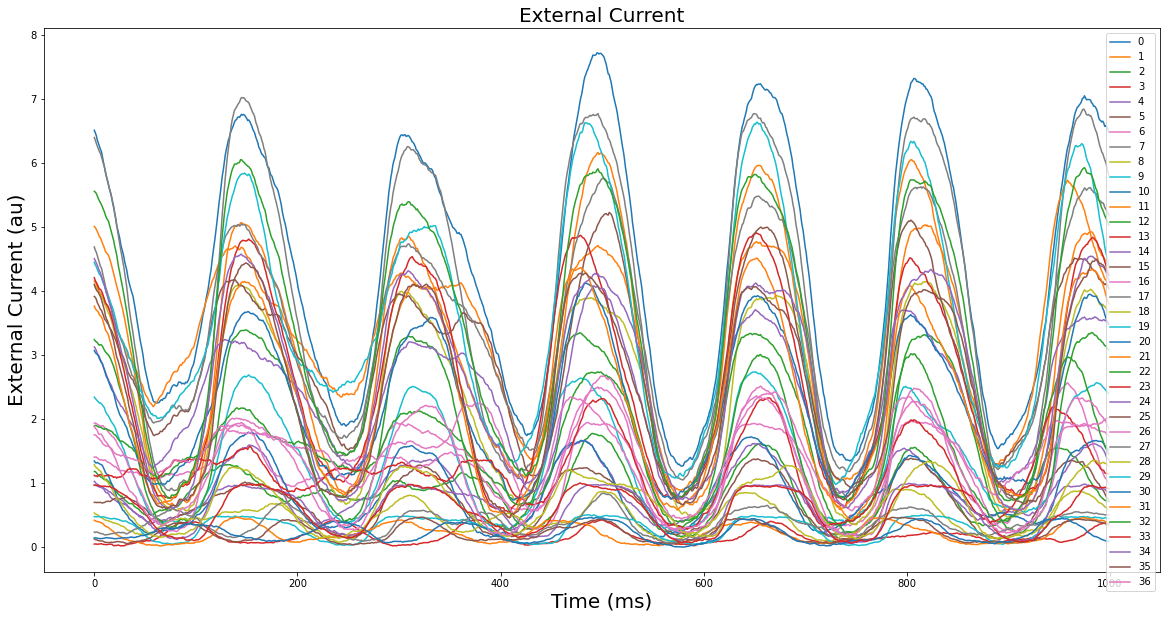

In [61]:
plt.plot(J_e)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('External Current (au)', fontsize=20)
plt.title('External Current', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()